In [14]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, random_split, ChainDataset
import torch.optim as optim
import matplotlib.pyplot as plt 

In [15]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")


In [16]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        n_classes = 2
        img_shape = (1,20,20,20)

        self.label_embedding = nn.Embedding(n_classes, n_classes)
        self.model = nn.Sequential(
            nn.Linear((1*20*20*20), 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 512),
            nn.Dropout(0.4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1),
        )

    def forward(self, img):
        validity = self.model(img)
        return validity


In [17]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv3d(1, 10, kernel_size=2, padding=1)
        self.conv2 = nn.Conv3d(10, 5, kernel_size=2, padding=1)
        self.fc1 = nn.Linear(5 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 5 * 5 * 5)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [18]:
realImages = np.load("originalSubsets.npy")
realImages.shape

(1967, 20, 20, 20)

In [19]:
fakeImages = np.load("rescaledSubsets.npy")
fakeImages.shape

(1967, 20, 20, 20)

In [20]:
import random
random.shuffle(realImages)
random.shuffle(fakeImages)
data = []
for realImage in realImages[:1960]:
    data.append((realImage,0.))

for fakeImage in fakeImages[:1960]:
    data.append((fakeImage, 1.))

In [21]:
data = DataLoader(data, shuffle=True)

In [22]:
model = Discriminator().to(device)
print(model)

Discriminator(
  (label_embedding): Embedding(2, 2)
  (model): Sequential(
    (0): Linear(in_features=8000, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Linear(in_features=512, out_features=512, bias=True)
    (6): Dropout(p=0.4, inplace=False)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [23]:
lr = 0.0002


adversarial_loss = torch.nn.MSELoss().to(device)

optimizer_D = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5,0.999))



In [10]:
iterations = 100
x = []
l = []
for epoch in range(1, iterations+1):
    loss_train = 0.0
    for (img, label) in data:
        
        img = img.view(-1).float().to(device)
        label = label.float().to(device)
        model.eval()
        output = model(img)
        optimizer_D.zero_grad()
        # Calculate loss on all-real batch
         = adversarial_loss(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        optimizer_D.step()
    x.append(epoch)
    l.append(errD_real.item())
    print(errD_real.item())


0.0824049636721611
0.4341897666454315
0.07769227772951126
0.10423415154218674
0.216607928276062
0.1011505126953125
0.36281266808509827
0.149639293551445
0.35406914353370667
0.23816806077957153
0.3114769756793976
0.21711140871047974
0.17857864499092102
0.14613963663578033
0.18909284472465515
0.26582419872283936
0.2508506178855896
0.24726440012454987
0.35994210839271545
0.17532774806022644
0.34712401032447815
0.022489363327622414
0.20701809227466583
0.23945416510105133
0.3290507197380066
0.0999344140291214
0.741817831993103
0.5123153328895569
0.24609068036079407
0.28728872537612915
0.1965416967868805
0.031556177884340286
0.902361273765564
0.12280570715665817
0.049818024039268494
0.14264483749866486
0.16613663733005524
0.06465484946966171
0.1847291737794876
0.2107960283756256
0.047076016664505005
0.04430399090051651
0.05376386642456055
0.19069890677928925
0.12266086786985397
0.3185361325740814
0.1361304372549057
0.24078784883022308
0.15572212636470795
0.3216600716114044
0.4519189894199371

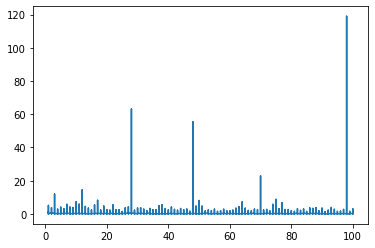

In [13]:
plt.plot(x,l)